In [106]:
%matplotlib inline
from mozilla_voice_tts.utils.audio import AudioProcessor
from mozilla_voice_tts.utils.io import load_config
from mozilla_voice_tts.utils.visual import plot_spectrogram
import librosa
import glob
import IPython.display as ipd
from PIL import Image
import PIL
import numpy as np
import torch

In [96]:

data_path = "/Users/julian/workspace/ML/mailabs"
CONFIG = load_config('config_fr.json')

ap16 = AudioProcessor(**CONFIG['audio']);
CONFIG['audio']['sample_rate'] = 22050
ap22 = AudioProcessor(**CONFIG['audio']);

> Setting up Audio Processor...
 | > sample_rate:16000
 | > num_mels:80
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > stats_path:None
 | > hop_length:256
 | > win_length:1024
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > num_mels:80
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | >

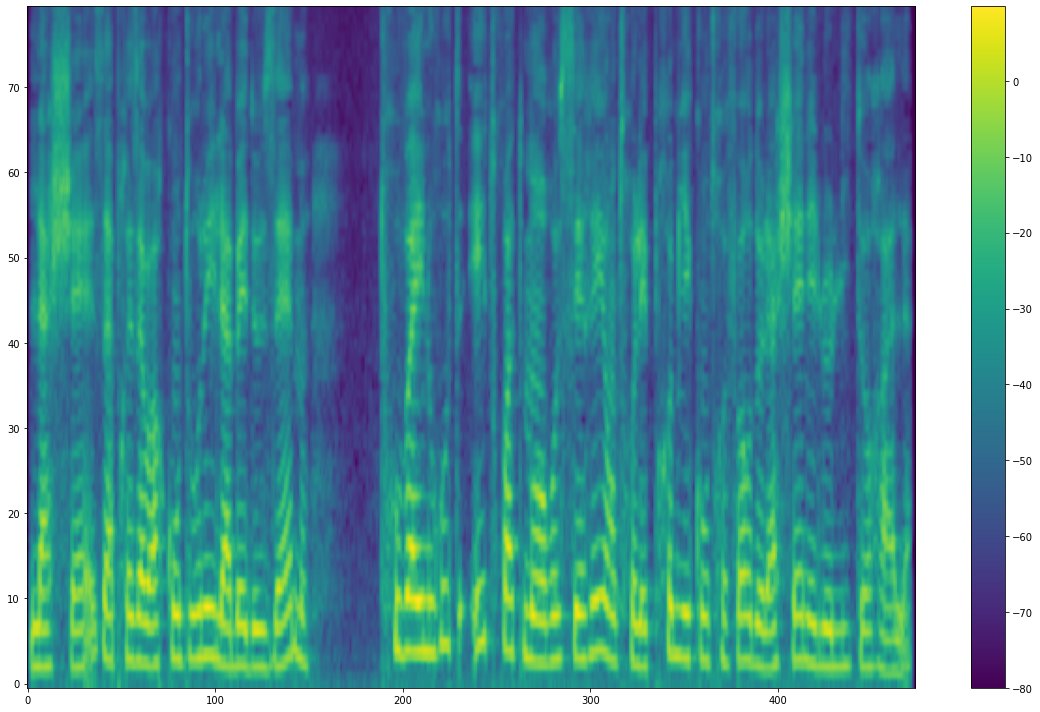

In [97]:
file_paths = glob.glob(data_path + "/**/*.wav", recursive=True)
wav16 = ap16.load_wav(file_paths[10])
wav22 = librosa.resample(wav16, 16000, 22050)
mel16 = ap16.melspectrogram(wav16)
plot_spectrogram(mel16.T, ap16)

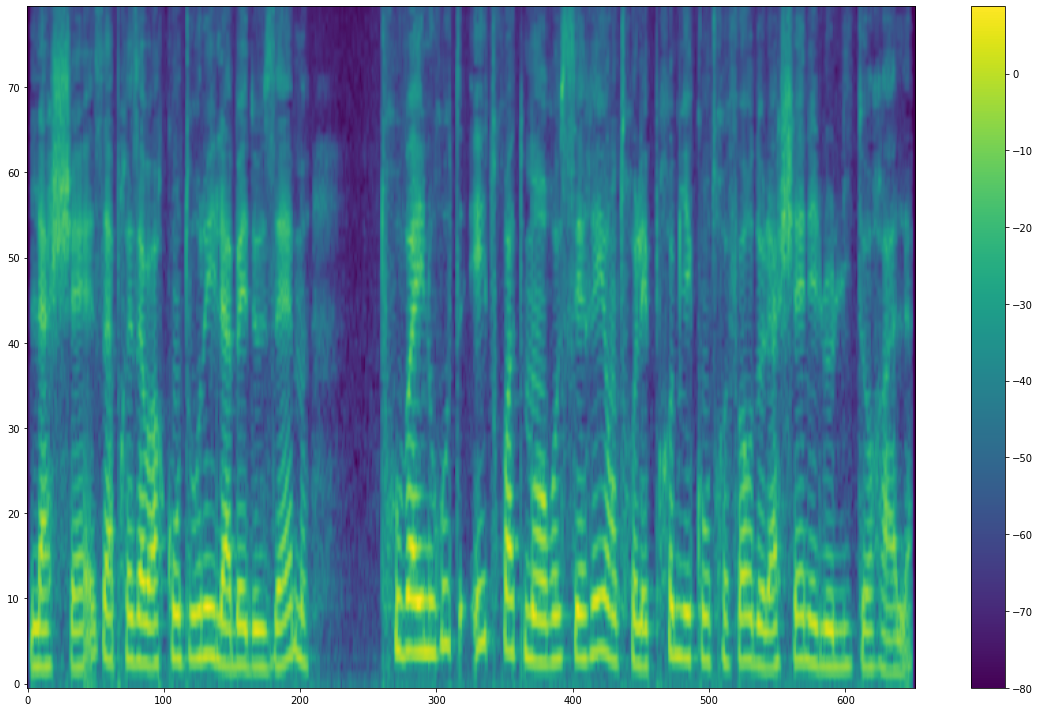

In [98]:
mel22 = ap22.melspectrogram(wav22)
plot_spectrogram(mel22.T, ap22)

In [120]:
mel16.shape

(80, 474)

In [157]:
mel22.shape

(80, 652)

In [158]:
def normalize(tensor):
    return ((tensor+4)/8)*255

In [159]:
mel16img = normalize(mel16)
mel22img = normalize(mel22)

In [160]:
mel16img = Image.fromarray(np.uint8(mel16img))

In [161]:
mel22img = Image.fromarray(np.uint8(mel22img))

In [162]:
mel16imgScaled = mel16img.resize(mel22.T.shape, PIL.Image.BILINEAR)

tensor(0.6993)


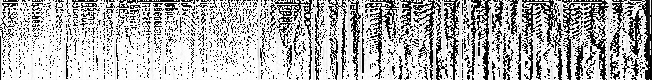

In [163]:
print(torch.tensor(np.array(mel22img) - mel16imgScaled).float().abs().mean()/255)
Image.fromarray(np.array(mel22img) - mel16imgScaled)

tensor(0.0265)


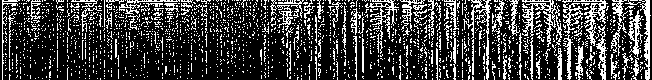

In [142]:
mel16imgScaled = mel16img.resize(mel22.T.shape, PIL.Image.NEAREST)
print(torch.tensor(np.array(mel22img) - mel16imgScaled).float().abs().mean()/255)
Image.fromarray(np.array(mel22img) - mel16imgScaled)

tensor(0.0399)


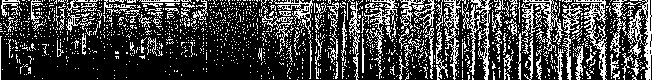

In [143]:
mel16imgScaled = mel16img.resize(mel22.T.shape, PIL.Image.CUBIC)
print(torch.tensor(np.array(mel22img) - mel16imgScaled).float().abs().mean()/255)
Image.fromarray(np.array(mel22img) - mel16imgScaled)

tensor(0.0419)


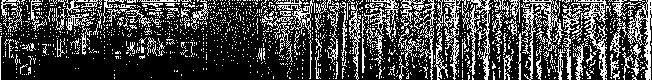

In [144]:
mel16imgScaled = mel16img.resize(mel22.T.shape, PIL.Image.LANCZOS)
print(torch.tensor(np.array(mel22img) - mel16imgScaled).float().abs().mean()/255)
Image.fromarray(np.array(mel22img) - mel16imgScaled)